In [140]:
library(escape)
library(dittoSeq)
library(Seurat)
library(SeuratObject)
library(clusterProfiler)
library(harmony)
library(tidydr)
library(rstatix)
library(ggpubr)
library(patchwork)
options(jupyter.plot_scale=1, future.globals.maxSize= 30*1024^3)

In [18]:
GO_non_redundant <- read.gmt("GO_merged_non_redundant_full_term_name_gene_symbol_rename.gmt")
hall_mark <- read.gmt("h.all.v2023.1.Hs.symbols.gmt")

In [21]:
GO_non_redundant_unique_TP = as.vector(unique(GO_non_redundant[,1]))
GO_non_redundant_gene_sets = list()
for(i in 1:length(GO_non_redundant_unique_TP)) {
    GO_non_redundant_gene_sets = c(GO_non_redundant_gene_sets,list(GO_non_redundant[which(GO_non_redundant[,1]==GO_non_redundant_unique_TP[i]),2]))
}
names(GO_non_redundant_gene_sets) = GO_non_redundant_unique_TP

hall_mark_unique_TP = as.vector(unique(hall_mark[,1]))
hall_mark_gene_sets = list()
for(i in 1:length(hall_mark_unique_TP)) {
    hall_mark_gene_sets = c(hall_mark_gene_sets,list(hall_mark[which(hall_mark[,1]==hall_mark_unique_TP[i]),2]))
}
names(hall_mark_gene_sets) = hall_mark_unique_TP

In [9]:
length(GO_non_redundant_gene_sets)

[1] 1303

In [10]:
load("pbmc_IFN_filtered.Rdata")

In [12]:
head(seurat_object_merged_filtered@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,label,tsne1,tsne2,ind,stim,clusters,cell.type,multiplets,percent.mt
,<chr>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>
AAACATACATTTCC-1_1,SeuratProject,3018,878,control,-27.6403728,14.96663,1016,ctrl,9,CD14+ Monocytes,singlet,0.09940358
AAACATACCAGAAA-1_1,SeuratProject,2481,713,control,-27.4936459,28.92489,1256,ctrl,9,CD14+ Monocytes,singlet,0.24183797
AAACATACCTCGCT-1_1,SeuratProject,3420,850,control,-24.3679974,20.42928,1256,ctrl,9,CD14+ Monocytes,singlet,0.08771930
AAACATACCTGGTA-1_1,SeuratProject,3158,1111,control,27.9521697,24.15974,1039,ctrl,4,Dendritic cells,singlet,0.06333122
AAACATACGATGAA-1_1,SeuratProject,1869,635,control,-0.4702364,-25.39871,1488,ctrl,5,CD4 T cells,singlet,0.05350455
AAACATACGGCATT-1_1,SeuratProject,1582,558,control,-17.6828029,21.00558,1015,ctrl,9,CD14+ Monocytes,singlet,0.06321113


In [14]:
hall_mark.ES.seurat <- enrichIt(obj = seurat_object_merged_filtered,
                      gene.sets = hall_mark_gene_sets,
                      groups = 1000, cores = 6)

GO_non_redundant.ES.seurat <- enrichIt(obj = seurat_object_merged_filtered,
                      gene.sets = GO_non_redundant_gene_sets,
                      groups = 1000, cores = 6)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.0 GiB”


[1] "Using sets of 1000 cells. Running 14 times."
Setting parallel calculations through a SnowParam back-end
with workers=6 and tasks=100.
Estimating ssGSEA scores for 50 gene sets.
Setting parallel calculations through a SnowParam back-end
with workers=6 and tasks=100.
Estimating ssGSEA scores for 50 gene sets.
Setting parallel calculations through a SnowParam back-end
with workers=6 and tasks=100.
Estimating ssGSEA scores for 50 gene sets.
Setting parallel calculations through a SnowParam back-end
with workers=6 and tasks=100.
Estimating ssGSEA scores for 50 gene sets.
Setting parallel calculations through a SnowParam back-end
with workers=6 and tasks=100.
Estimating ssGSEA scores for 50 gene sets.
Setting parallel calculations through a SnowParam back-end
with workers=6 and tasks=100.
Estimating ssGSEA scores for 50 gene sets.
Setting parallel calculations through a SnowParam back-end
with workers=6 and tasks=100.
Estimating ssGSEA scores for 50 gene sets.
Setting parallel calculati

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.0 GiB”


[1] "Using sets of 1000 cells. Running 14 times."
Setting parallel calculations through a SnowParam back-end
with workers=6 and tasks=100.
Estimating ssGSEA scores for 1303 gene sets.
Setting parallel calculations through a SnowParam back-end
with workers=6 and tasks=100.
Estimating ssGSEA scores for 1303 gene sets.
Setting parallel calculations through a SnowParam back-end
with workers=6 and tasks=100.
Estimating ssGSEA scores for 1303 gene sets.
Setting parallel calculations through a SnowParam back-end
with workers=6 and tasks=100.
Estimating ssGSEA scores for 1303 gene sets.
Setting parallel calculations through a SnowParam back-end
with workers=6 and tasks=100.
Estimating ssGSEA scores for 1303 gene sets.
Setting parallel calculations through a SnowParam back-end
with workers=6 and tasks=100.
Estimating ssGSEA scores for 1303 gene sets.
Setting parallel calculations through a SnowParam back-end
with workers=6 and tasks=100.
Estimating ssGSEA scores for 1303 gene sets.
Setting para

In [15]:
GO_non_redundant.ES.seurat_filter = GO_non_redundant.ES.seurat[,grep("(interferon|IFN)",colnames(GO_non_redundant.ES.seurat))]
names(GO_non_redundant.ES.seurat_filter)

[1] "BP_type_I_interferon_production"  "BP_interferon_gamma_production"  
[3] "BP_response_to_type_I_interferon" "BP_response_to_interferon_gamma" 
[5] "BP_response_to_interferon_alpha"  "BP_response_to_interferon_beta"

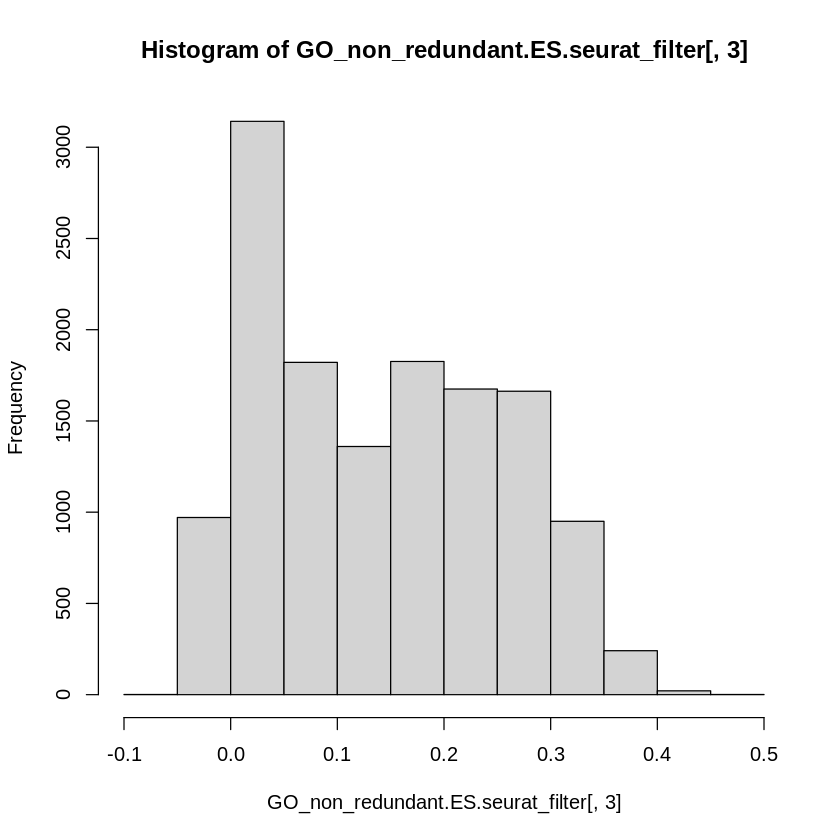

In [16]:
hist(GO_non_redundant.ES.seurat_filter[,3])

In [17]:
seurat_object_merged_filtered <- Seurat::AddMetaData(seurat_object_merged_filtered, GO_non_redundant.ES.seurat_filter)

In [38]:
seurat_object_merged_filtered <- seurat_object_merged_filtered %>% 
    FindVariableFeatures(verbose = FALSE) %>% 
    ScaleData() %>% RunPCA(npcs = 100, verbose = FALSE)  %>% 
    RunHarmony('stim') %>%
    RunUMAP(dims = 1:20, verbose=FALSE, min.dist=0.3) 

Centering and scaling data matrix

Harmony 1/10

Harmony 2/10

Harmony converged after 2 iterations

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


In [42]:
saveRDS(seurat_object_merged_filtered, 'pbmc.rds')

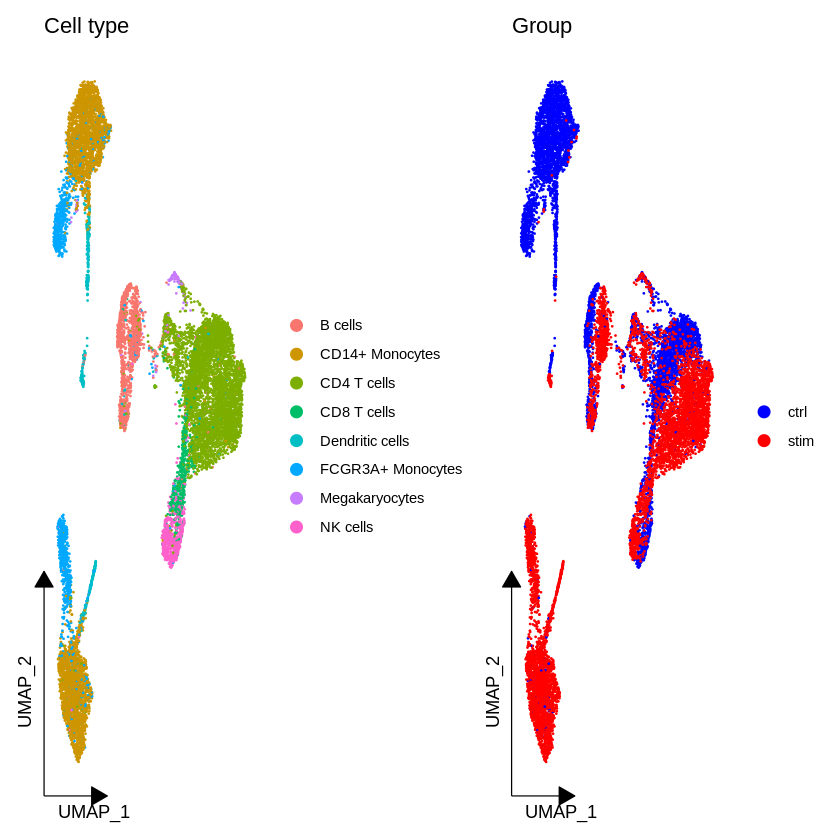

In [93]:
umap_type <- DimPlot(seurat_object_merged_filtered, group.by='cell.type') + theme_dr() + 
    theme(panel.grid=element_blank()) + labs(title='Cell type')
umap_group <- DimPlot(seurat_object_merged_filtered, group.by='stim') + theme_dr() + 
    theme(panel.grid=element_blank()) + labs(title='Group') + scale_color_manual(values=c('blue','red'))
umap_type + umap_group
ggsave('umap_type_group.png', width=9, height=3.7, dpi=200)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


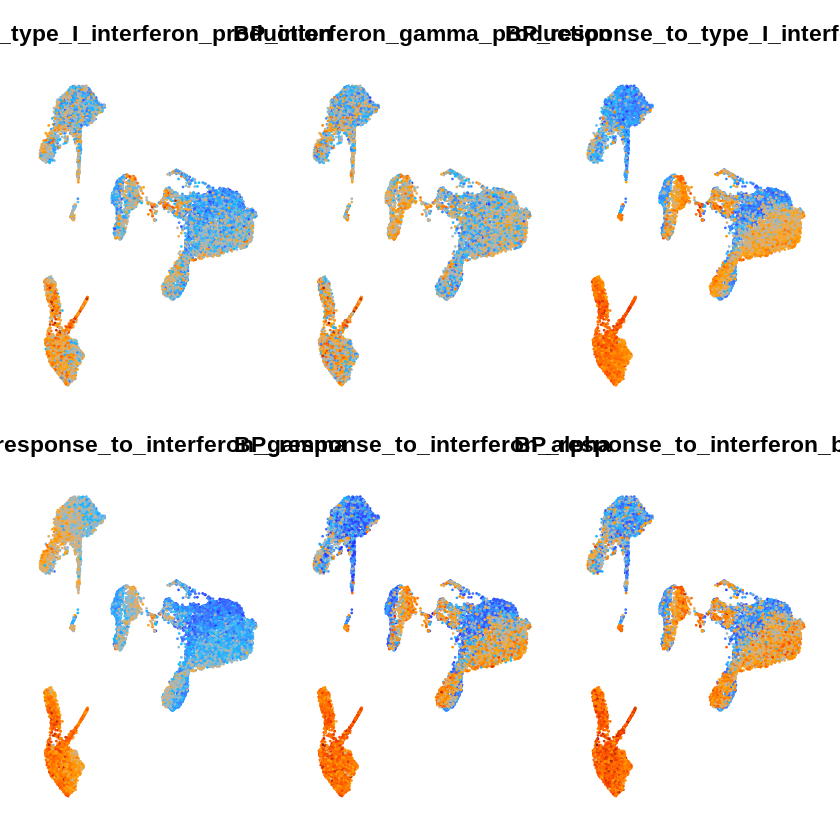

In [88]:
FeaturePlot(seurat_object_merged_filtered, names(GO_non_redundant.ES.seurat_filter), ncol=3) & 
    NoLegend() & NoAxes() & scale_color_gradientn(colors=c('blue','deepskyblue','orange','orangered','red4')) &
    theme(title=element_text(size=12))
ggsave('umap_IFN.png', width=10, height=6, dpi=200)

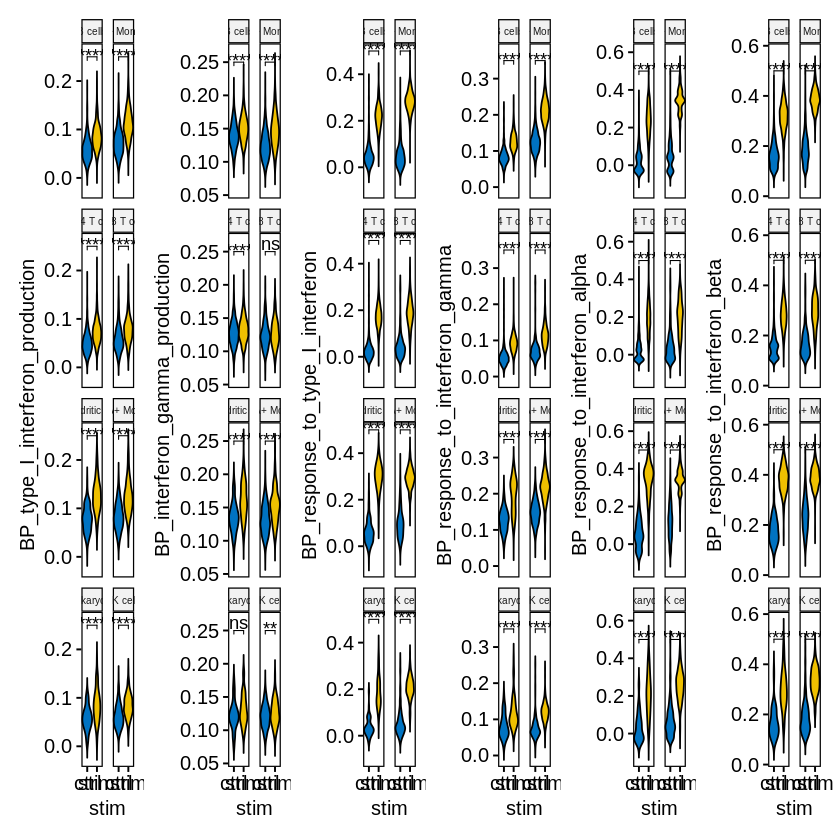

In [148]:
Idents(seurat_object_merged_filtered) <- 'cell.type'
vln_list <- list()
ypos <- c(0.25,0.25,0.5,0.35,0.5,0.5)
for(i in 1:length(names(GO_non_redundant.ES.seurat_filter)))
{
    fm <- as.formula(paste(names(GO_non_redundant.ES.seurat_filter)[i], '~ stim'))
    stat.test <- seurat_object_merged_filtered@meta.data %>% group_by(cell.type) %>% wilcox_test(fm)  %>%
      adjust_pvalue() %>% add_significance("p.adj")
    vln_list[[i]] <- ggviolin(seurat_object_merged_filtered@meta.data, x = "stim", y = names(GO_non_redundant.ES.seurat_filter)[i],
      fill = "stim", palette = "jco", facet.by = "cell.type", ncol=2) + 
      theme(legend.position='none', strip.text=element_text(size=6)) +
      stat_pvalue_manual(stat.test, label = "p.adj.signif", y.position = ypos[i])
}
wrap_plots(vln_list, nrow=1)
ggsave('vln_IFN.png', width=15, height=6, dpi=200)

png 
  2

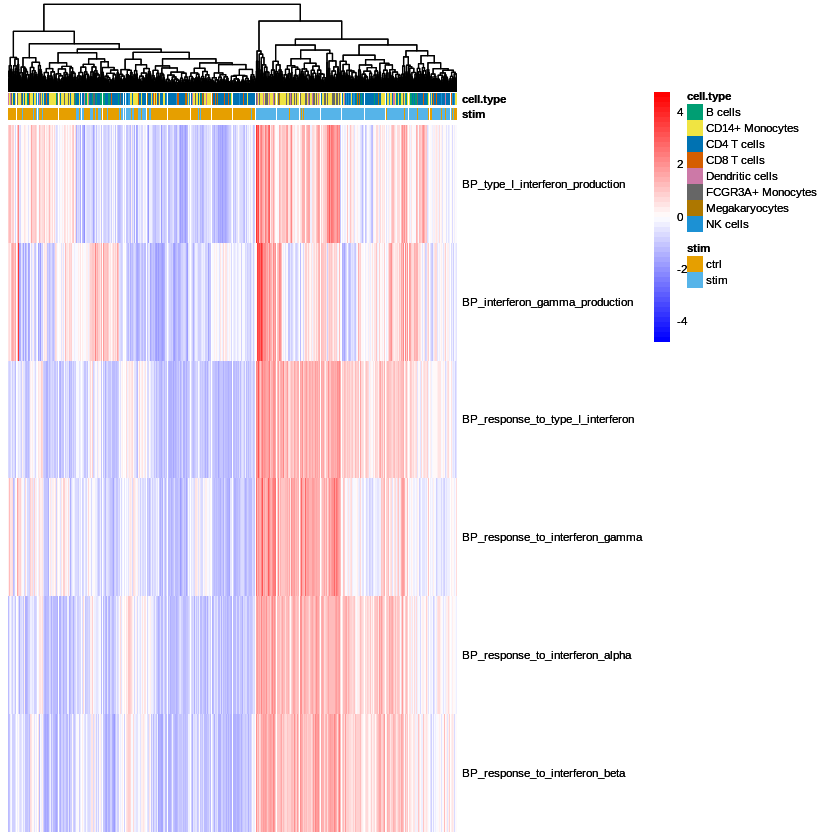

In [99]:
p <- dittoHeatmap(seurat_object_merged_filtered, genes = NULL, metas = names(GO_non_redundant.ES.seurat_filter),
             annot.by = c('stim', 'cell.type'), cluster_rows=F,
             fontsize = 7,
             cluster_cols = TRUE)
print(p)
png('heatmap_IFN.png', width=10, height=3.5, unit='in', res=200)
print(p)
dev.off()